# Data Cleaning & EDA

In [1]:
#pip install dython

In [2]:
import pandas as pd
import seaborn as sns
import dython.data_utils as du
import dython.nominal as nom
import matplotlib.pyplot as plt
from datetime import datetime


pd.set_option('display.max_columns', None)


In [3]:
X = pd.read_csv('X_train_comp.csv', index_col=0)
y = pd.read_csv('y_train_comp.csv', index_col=0)

In [4]:
#check X and y ids match
print(len(X))
sum(X.index == y.index)

59400


59400

In [5]:
df = pd.concat([X, y], axis =1)
df.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [7]:
df.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Many of the columns are very similar so I'll check the multicollinearity, see what I can drop.

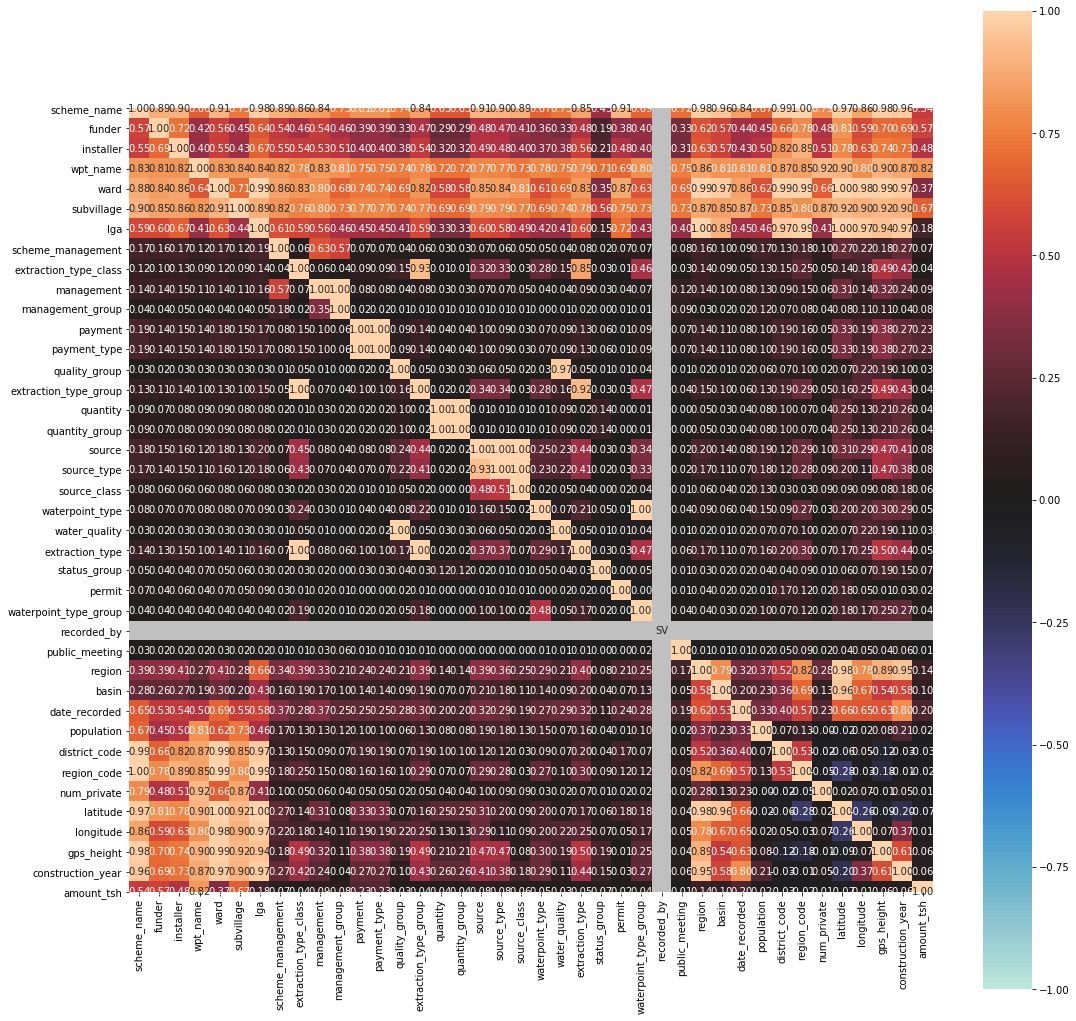

In [9]:
assoc2 = nom.associations(df, theil_u=True, clustering=True, 
                         nan_strategy='drop_samples', figsize=(18,18))

In [10]:
corr = assoc2['corr'].abs().stack().reset_index().sort_values(0, ascending = False)
corr = corr[corr.level_0 != corr.level_1]

In [11]:
corr['pairs1'] = list(zip(corr.level_0, corr.level_1))
corr['pairs2'] = list(zip(corr.level_1, corr.level_0))

In [12]:
corr1 = corr.set_index('pairs1').drop(['level_0', 'level_1', 'pairs2'], axis=1)
corr2 = corr.set_index('pairs2').drop(['level_0', 'level_1', 'pairs1'], axis=1)
corr1.columns = ['cc1']
corr2.columns = ['cc2']
corr1 = corr1.sort_index()
corr2 = corr2.sort_index()
print(sum(corr1.index == corr2.index))    #Check the indices match
corr3 = pd.concat([corr1, corr2], axis=1)
print(sum(corr3.cc1 == corr3.cc2))        #Check for assymetric pairs
corr3.sort_values(['cc1', 'cc2'], ascending=False)

1560
694


,cc1,cc2
"(payment, payment_type)",1.0,1.000000
"(payment_type, payment)",1.0,1.000000
"(quantity, quantity_group)",1.0,1.000000
"(quantity_group, quantity)",1.0,1.000000
"(water_quality, quality_group)",1.0,0.973053
...,...,...
"(ward, recorded_by)",0.0,0.000000
"(water_quality, recorded_by)",0.0,0.000000
"(waterpoint_type, recorded_by)",0.0,0.000000
"(waterpoint_type_group, recorded_by)",0.0,0.000000


In [13]:
corr[corr[0] == 1]

,level_0,level_1,0,pairs1,pairs2
491,payment_type,payment,1.0,"(payment_type, payment)","(payment, payment_type)"
698,source,source_type,1.0,"(source, source_type)","(source_type, source)"
655,quantity_group,quantity,1.0,"(quantity_group, quantity)","(quantity, quantity_group)"
616,quantity,quantity_group,1.0,"(quantity, quantity_group)","(quantity_group, quantity)"
568,extraction_type_group,extraction_type_class,1.0,"(extraction_type_group, extraction_type_class)","(extraction_type_class, extraction_type_group)"
452,payment,payment_type,1.0,"(payment, payment_type)","(payment_type, payment)"
370,management,management_group,1.0,"(management, management_group)","(management_group, management)"
268,lga,region,1.0,"(lga, region)","(region, lga)"
699,source,source_class,1.0,"(source, source_class)","(source_class, source)"
739,source_type,source_class,1.0,"(source_type, source_class)","(source_class, source_type)"


In [14]:
df.head(20)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1,True,GeoData Consultants Ltd,Water Board,BL Bondeni,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
48451,500.0,2011-07-04,Unicef,1703,DWE,34.642439,-9.106185,Kwa John Mtenzi,0,Rufiji,Kidudumo,Iringa,11,4,Njombe,Mdandu,35,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
58155,0.0,2011-09-04,Unicef,1656,DWE,34.569266,-9.085515,Kwa Rose Chaula,0,Rufiji,Yeriko,Iringa,11,4,Njombe,Usuka,50,True,GeoData Consultants Ltd,WUA,wanging'ombe water supply s,True,1978,gravity,gravity,gravity,wua,user-group,pay when scheme fails,on failure,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,non functional
18274,500.0,2011-02-22,Danida,1763,Danid,34.508967,-9.894412,none,0,Lake Nyasa,Manyanya,Iringa,11,5,Ludewa,Mawengi,1,True,GeoData Consultants Ltd,VWC,Makanj,True,1992,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
48375,200.0,2011-02-27,Twe,2216,TWE,34.473430,-9.594990,none,0,Lake Nyasa,Majengo,Iringa,11,4,Njombe,Matola,4,True,GeoData Consultants Ltd,VWC,Kidabu,False,2008,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


## Missing Values

In [15]:
du.identify_columns_with_na(df)

,column,na_count


In [16]:
snc = corr[corr.level_1 == 'scheme_name']
snc

,level_0,level_1,0,pairs1,pairs2
1320,region_code,scheme_name,0.996415,"(region_code, scheme_name)","(scheme_name, region_code)"
1280,district_code,scheme_name,0.988867,"(district_code, scheme_name)","(scheme_name, district_code)"
1480,gps_height,scheme_name,0.983963,"(gps_height, scheme_name)","(scheme_name, gps_height)"
1400,latitude,scheme_name,0.968919,"(latitude, scheme_name)","(scheme_name, latitude)"
1520,construction_year,scheme_name,0.964743,"(construction_year, scheme_name)","(scheme_name, construction_year)"
200,subvillage,scheme_name,0.900251,"(subvillage, scheme_name)","(scheme_name, subvillage)"
160,ward,scheme_name,0.879387,"(ward, scheme_name)","(scheme_name, ward)"
1440,longitude,scheme_name,0.864780,"(longitude, scheme_name)","(scheme_name, longitude)"
120,wpt_name,scheme_name,0.830787,"(wpt_name, scheme_name)","(scheme_name, wpt_name)"
1360,num_private,scheme_name,0.785354,"(num_private, scheme_name)","(scheme_name, num_private)"


In [17]:
print(len(df[df.scheme_name.notna()]))
df.scheme_name.value_counts()

27813


None                                640
Borehole                            543
Chalinze wate                       404
Ngana water supplied scheme         270
wanging'ombe water supply s         261
                                   ... 
Nkea                                  1
NYA /MAK /BUK piped scheme            1
Tung                                  1
EKTM 2 water  supply                  1
mwamagembe windmill piped scheme      1
Name: scheme_name, Length: 2577, dtype: int64

In [18]:
df[df.scheme_name.isna()].status_group.value_counts(normalize=True)

Series([], Name: status_group, dtype: float64)

scheme_name:   

Almost half the values are missing. Of those included there are 2696 different values, which hinders filling the missing ones.This feature also has high association with other features. However a waterpoint with a missing scheme name is more likely to be non-functional than one with a scheme name, so I'll leave the column in for now and fill missing values with 'unknown'.

In [19]:
df.scheme_name.fillna('unknown', inplace=True)
df.scheme_name.isna().sum()

0

In [87]:
du.identify_columns_with_na(df)

,column,na_count


In [21]:
df.scheme_management.value_counts()

VWC                 18084
Water Board          2366
WUA                  2282
Water authority      2110
Company              1006
WUG                   983
Parastatal            422
Private operator      323
Other                 218
Trust                  19
Name: scheme_management, dtype: int64

In [22]:
corr[corr.level_0 == 'scheme_management']

,level_0,level_1,0,pairs1,pairs2
289,scheme_management,management,0.628344,"(scheme_management, management)","(management, scheme_management)"
290,scheme_management,management_group,0.565167,"(scheme_management, management_group)","(management_group, scheme_management)"
318,scheme_management,construction_year,0.274807,"(scheme_management, construction_year)","(construction_year, scheme_management)"
315,scheme_management,latitude,0.267114,"(scheme_management, latitude)","(latitude, scheme_management)"
316,scheme_management,longitude,0.221369,"(scheme_management, longitude)","(longitude, scheme_management)"
286,scheme_management,lga,0.189076,"(scheme_management, lga)","(lga, scheme_management)"
317,scheme_management,gps_height,0.181842,"(scheme_management, gps_height)","(gps_height, scheme_management)"
313,scheme_management,region_code,0.180909,"(scheme_management, region_code)","(region_code, scheme_management)"
311,scheme_management,population,0.172137,"(scheme_management, population)","(population, scheme_management)"
282,scheme_management,installer,0.167920,"(scheme_management, installer)","(installer, scheme_management)"


In [23]:
df[df.scheme_management=='WUG'].management.value_counts(normalize=True)

wug           0.602238
vwc           0.378433
other         0.014242
company       0.004069
parastatal    0.001017
Name: management, dtype: float64

In [24]:
proportion = df.groupby('management').agg(lambda x: x.scheme_management.value_counts(normalize=True)[0]).scheme_management
count = df.groupby('management').count().scheme_management
common = df.groupby('management').agg(lambda x: x.value_counts(normalize=True).index[0]).scheme_management
dfsm = pd.DataFrame([count, proportion, common]).transpose()
dfsm.columns = ['count', 'proportion', 'common']
dfsm.sort_values('count', ascending=False)

,count,proportion,common
management,,,
vwc,19567,0.895385,VWC
water board,2442,0.745291,Water Board
wua,1933,0.928608,WUA
wug,990,0.59798,WUG
private operator,920,0.291304,Private operator
company,639,0.984351,Company
water authority,544,0.994485,Water authority
parastatal,462,0.731602,Parastatal
other,260,0.688462,Other


In [25]:
na_count = df[df.scheme_management.isna()].groupby('management').count().lga
na_count

Series([], Name: lga, dtype: int64)

scheme_management:   
Will replace each missing value with the most common value of entries with the same 'management' entry

In [26]:
for x, y in dfsm.iterrows():
    df.scheme_management[(df.management == x) & (df.scheme_management.isna())] = y['common']

C:\Users\Maltanno\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
du.identify_columns_with_na(df)

,column,na_count


In [28]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1,True,GeoData Consultants Ltd,Water Board,BL Bondeni,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67885,0.0,2011-03-16,Mkinga Distric Coun,0,DWE,38.835001,-4.880204,Mijohoroni,0,Pangani,Mtakuja A,Tanga,4,8,Mkinga,Maramba,360,True,GeoData Consultants Ltd,VWC,Magati water schem,True,1992,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
47002,6.0,2013-08-03,Ces(gmbh),1383,DWE,37.454759,-3.323599,Kwa Luka Msaki,0,Pangani,Yamu Juu,Kilimanjaro,3,4,Moshi Rural,Kirua Vunjo Kusini,1,True,GeoData Consultants Ltd,Water Board,Kirua kahe gravity water supply trust,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,Pangani,Maore Kati,Kilimanjaro,3,3,Same,Maore,210,True,GeoData Consultants Ltd,Water authority,Hingilili,True,1967,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional


In [29]:
print(len(df.installer.value_counts()))
print(len(df.funder.value_counts()))

908
866


installer, funder   
With so many different values I'm going to replace them with 'unknown'

In [30]:
df.installer.fillna('unknown', inplace=True)
df.funder.fillna('unknown', inplace=True)

In [31]:
du.identify_columns_with_na(df)

,column,na_count


In [32]:
df.public_meeting.value_counts()

True     25922
False     1891
Name: public_meeting, dtype: int64

In [33]:
df.permit.value_counts()

True     21880
False     5933
Name: permit, dtype: int64

public_meeting, permit
Will replace missing values with 'unknown'

In [34]:
df.public_meeting.fillna('unknown', inplace=True)
df.permit.fillna('unknown', inplace=True)

In [35]:
du.identify_columns_with_na(df)

,column,na_count


In [36]:
df.subvillage.value_counts()

Kati            278
Majengo         275
Shuleni         247
Madukani        224
Sokoni          136
               ... 
Mateso Kati       1
Mshisha           1
Mkanga Chuni      1
Mtimui            1
Lushewa           1
Name: subvillage, Length: 8940, dtype: int64

subvillage:  
replace with unknown

In [37]:
df.subvillage.fillna('unknown', inplace=True)

## Placeholder Values

In [38]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
50495,0.0,2013-03-15,Lawatefuka Water Supply,1368,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1,True,GeoData Consultants Ltd,Water Board,BL Bondeni,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
53752,0.0,2012-10-20,Biore,0,WEDECO,34.364073,-3.629333,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67885,0.0,2011-03-16,Mkinga Distric Coun,0,DWE,38.835001,-4.880204,Mijohoroni,0,Pangani,Mtakuja A,Tanga,4,8,Mkinga,Maramba,360,True,GeoData Consultants Ltd,VWC,Magati water schem,True,1992,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
47002,6.0,2013-08-03,Ces(gmbh),1383,DWE,37.454759,-3.323599,Kwa Luka Msaki,0,Pangani,Yamu Juu,Kilimanjaro,3,4,Moshi Rural,Kirua Vunjo Kusini,1,True,GeoData Consultants Ltd,Water Board,Kirua kahe gravity water supply trust,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
44885,0.0,2013-08-03,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,0,Pangani,Maore Kati,Kilimanjaro,3,3,Same,Maore,210,True,GeoData Consultants Ltd,Water authority,Hingilili,True,1967,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional


In [39]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,27813.000000,27813.000000,27813.000000,2.781300e+04,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,480.497983,889.215367,35.199611,-5.824775e+00,0.684212,12.184770,4.722072,166.354582,1573.926006
std,3537.308629,694.639539,4.622145,2.798223e+00,6.840316,16.074906,6.659281,371.835783,814.948826
min,0.000000,-90.000000,0.000000,-1.156451e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,79.000000,34.223782,-8.720476e+00,0.000000,3.000000,2.000000,1.000000,1972.000000
50%,0.000000,1005.000000,35.865366,-4.935434e+00,0.000000,11.000000,3.000000,52.000000,1993.000000
75%,150.000000,1459.000000,37.496537,-3.354251e+00,0.000000,16.000000,5.000000,200.000000,2006.000000
max,250000.000000,2628.000000,40.323402,-2.000000e-08,280.000000,99.000000,80.000000,15300.000000,2013.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 69572 to 27263
Data columns (total 40 columns):
amount_tsh               27813 non-null float64
date_recorded            27813 non-null object
funder                   27813 non-null object
gps_height               27813 non-null int64
installer                27813 non-null object
longitude                27813 non-null float64
latitude                 27813 non-null float64
wpt_name                 27813 non-null object
num_private              27813 non-null int64
basin                    27813 non-null object
subvillage               27813 non-null object
region                   27813 non-null object
region_code              27813 non-null int64
district_code            27813 non-null int64
lga                      27813 non-null object
ward                     27813 non-null object
population               27813 non-null int64
public_meeting           27813 non-null bool
recorded_by              27813 non-null objec

In [41]:
def col_eda(col):
    print(col,':\n', df[col].value_counts().head(15),'\n')

In [42]:
for col in df:
    col_eda(col)

amount_tsh :
 0.0       15679
500.0      1993
50.0       1540
20.0       1027
1000.0      886
200.0       813
10.0        689
30.0        523
250.0       515
100.0       404
300.0       398
5.0         373
2000.0      354
5000.0      285
3000.0      225
Name: amount_tsh, dtype: int64 

date_recorded :
 2011-03-17    383
2011-03-15    379
2011-03-14    341
2011-03-09    305
2011-03-18    278
2013-03-04    268
2011-03-16    266
2011-03-19    262
2013-02-19    249
2013-03-15    249
2013-03-13    248
2011-03-13    248
2011-03-24    245
2013-02-03    242
2011-02-28    240
Name: date_recorded, dtype: int64 

funder :
 Government Of Tanzania    6050
Danida                    1908
World Bank                 763
Unicef                     689
Norad                      653
Private Individual         616
Germany Republi            610
District Council           537
Ministry Of Water          505
Water                      397
Rwssp                      356
World Vision               304
Hesawa  

source :
 spring                  13121
river                    7576
machine dbh              4461
shallow well             1089
lake                      544
dam                       459
rainwater harvesting      291
other                     139
hand dtw                  117
unknown                    16
Name: source, dtype: int64 

source_type :
 spring                  13121
river/lake               8120
borehole                 4578
shallow well             1089
dam                       459
rainwater harvesting      291
other                     155
Name: source_type, dtype: int64 

source_class :
 groundwater    18788
surface         8870
unknown          155
Name: source_class, dtype: int64 

waterpoint_type :
 communal standpipe             20307
communal standpipe multiple     4771
hand pump                       1396
other                           1194
improved spring                   76
cattle trough                     64
dam                                5
Name: wate

Columns with imputable placeholders:
- gps_height
- longitude
- latitude
- population?
- construction year?

In [43]:
df[df.latitude == -2.000000e-08].groupby('subvillage').sum().sum()

amount_tsh              0.000000
gps_height              0.000000
longitude               0.000000
latitude               -0.000007
num_private             0.000000
region_code          6308.000000
district_code        1748.000000
population              0.000000
public_meeting        332.000000
permit                332.000000
construction_year       0.000000
dtype: float64

In [57]:
df[df.gps_height == 0].groupby('subvillage').sum().sum()

amount_tsh               0.000000
gps_height               0.000000
longitude            26543.727579
latitude             -2689.250979
num_private              0.000000
region_code          13299.000000
district_code         4595.000000
population               0.000000
public_meeting         731.000000
permit                 696.000000
construction_year        0.000000
dtype: float64

Missing data spreads across whole subvillages -can't use common subvillage as a basis to impute 

In [45]:
df.ward.value_counts()
df[df.ward == 'Igosi'].describe()
# -mostly low std within ward

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,301.000000,301.000000,301.000000,301.000000,301.0,301.0,301.0,301.000000,301.000000
mean,646.179402,2112.674419,34.523339,-9.304405,0.0,11.0,4.0,47.096346,2000.936877
std,1222.794758,108.875465,0.060195,0.052933,0.0,0.0,0.0,52.113537,7.752806
min,0.000000,1240.000000,34.341349,-9.407268,0.0,11.0,4.0,1.000000,1967.000000
25%,0.000000,2039.000000,34.501156,-9.334236,0.0,11.0,4.0,20.000000,1998.000000
50%,0.000000,2138.000000,34.542636,-9.302822,0.0,11.0,4.0,30.000000,2004.000000
75%,1000.000000,2166.000000,34.565855,-9.277996,0.0,11.0,4.0,50.000000,2006.000000
max,4000.000000,2385.000000,34.631938,-8.723208,0.0,11.0,4.0,367.000000,2010.000000


In [46]:
df.latitude.replace(-2.000000e-08, 0, inplace=True)
# replace placeholder with 0 -the placeholder used in other columns

Negative gps_height:   
The lowest point in Tanzania is sea level however the geoid height is negative in Tanzania, so negative gps-height is possible. Still, looking at the data the value of -90 seems a bit too much, I'll replace with zero


In [47]:
df.loc[38774, 'gps_height'] = 0

In [48]:
df.sort_values('gps_height').head(40)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44724,10.0,2013-02-04,Mtuwasa,-63,MTUWASA,40.154793,-10.266446,Kioski Cha Miseti,0,Ruvuma / Southern Coast,Miseti,Mtwara,9,5,Mtwara Urban,Chuno,353,True,GeoData Consultants Ltd,Water authority,Miseti,True,2007,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
14754,0.0,2013-03-04,Government Of Tanzania,-51,DWE,39.496065,-8.510336,Mjaka,0,Ruvuma / Southern Coast,Songosongo,Lindi,80,13,Kilwa,Songosongo,100,True,GeoData Consultants Ltd,VWC,Songosongo Water supply,True,1975,submersible,submersible,submersible,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,spring,spring,groundwater,other,other,non functional
50247,20.0,2013-03-04,Songas,-51,Artisan,39.496621,-8.510579,Kimbeche 1,0,Ruvuma / Southern Coast,Songosongo,Lindi,80,13,Kilwa,Songosongo,150,True,GeoData Consultants Ltd,VWC,Songas Water supply,True,2006,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional needs repair
67898,50.0,2013-02-01,Unicef,-49,Unisef,40.125514,-10.255980,Kwa Hamisy Usufu,0,Ruvuma / Southern Coast,Pemba Pwani,Mtwara,99,1,Mtwara Rural,Naumbu,500,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1974,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
73969,0.0,2013-01-31,Us Embassy,-49,US Embassy,39.662239,-9.494238,Kwa Bonga,0,Ruvuma / Southern Coast,Mwera,Lindi,80,23,Lindi Rural,Kilolambwani,1,False,GeoData Consultants Ltd,VWC,US Embassy Borehole Scheme,False,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
72015,50.0,2013-02-01,Unicef,-48,Unisef,40.125943,-10.243909,Kwa Mzee Polo,0,Ruvuma / Southern Coast,Samwange,Mtwara,99,1,Mtwara Rural,Naumbu,30,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1985,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional
51703,30.0,2013-02-08,Ten Degree Hotel,-48,MTUWASA,40.121601,-10.278735,Kwa Shehe Dadi,0,Ruvuma / Southern Coast,Mnaida,Mtwara,9,5,Mtwara Urban,Mitengo,79,True,GeoData Consultants Ltd,VWC,Mnaida,True,2007,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
26750,0.0,2013-01-31,Us Embassy,-48,US Embassy,39.664649,-9.495188,Shuleni,0,Ruvuma / Southern Coast,Stendi,Lindi,80,23,Lindi Rural,Kilolambwani,1,False,GeoData Consultants Ltd,VWC,US Embassy Borehole Scheme,False,2012,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
21329,50.0,2013-02-01,Unicef,-48,Unisef,40.126387,-10.232516,Msikitini,0,Ruvuma / Southern Coast,Namanguni,Mtwara,99,1,Mtwara Rural,Naumbu,400,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1974,ksb,submersible,submersible,unknown,unknown,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe 

In [49]:
#Find the mean for each  of the following columns in each ward which has some of that column's data missing
result = {}
cols = ['gps_height', 'longitude', 'latitude', 'population']
for col in cols:
    msv = list(set(df[df[col] == 0].ward))
    missing = []
    imp = []
    for n, sv in enumerate(msv):
        try:
            imp.append((sv, df[df[col] != 0].groupby('ward').mean().loc[sv][col]))
            print(n, sv, col, '\timp')
        except:
            missing.append(sv)
            print(n, sv, col, '\tmissing')
    result[col] = [imp, missing]

0 Kamachumu gps_height 	missing
1 Shagihilu gps_height 	missing
2 Lalago gps_height 	missing
3 Idifu gps_height 	missing
4 Nyalikungu gps_height 	missing
5 Misha gps_height 	missing
6 Uyumbu gps_height 	missing
7 Ng'hoboko gps_height 	missing
8 Kigwe gps_height 	missing
9 Ndama gps_height 	missing
10 Kizumbi gps_height 	missing
11 Kamuli gps_height 	missing
12 Kingale gps_height 	missing
13 Isevya gps_height 	missing
14 Upuge gps_height 	missing
15 Kasungamile gps_height 	missing
16 Lusungo gps_height 	missing
17 Mwamalili gps_height 	missing
18 Kikore gps_height 	missing
19 Kibondo gps_height 	missing
20 Kirushya gps_height 	missing
21 Talaga gps_height 	missing
22 Uyovu gps_height 	missing
23 Nala gps_height 	missing
24 Kalamba gps_height 	missing
25 Igunga gps_height 	missing
26 Isaka gps_height 	missing
27 Mbutu gps_height 	missing
28 Ntobeye gps_height 	missing
29 Ruvu gps_height 	imp
30 Busisi gps_height 	missing
31 Mwisi gps_height 	missing
32 Ngh'ong'ona gps_height 	missing
33 

261 Mwamanongu gps_height 	missing
262 Mwamalole gps_height 	missing
263 Magiri gps_height 	missing
264 Mwaya gps_height 	imp
265 Daluni gps_height 	missing
266 Kulimi gps_height 	missing
267 Kakola gps_height 	missing
268 Kahama Urban gps_height 	missing
269 Paranga gps_height 	missing
270 Shabaka gps_height 	missing
271 Ukenyenge gps_height 	missing
272 Mpendo gps_height 	missing
273 Membe gps_height 	missing
274 Ibwera gps_height 	missing
275 Kwamndolwa gps_height 	missing
276 Buchambi gps_height 	missing
277 Kamhanga gps_height 	missing
278 Kafita gps_height 	missing
279 Kaseme gps_height 	missing
280 Bugene gps_height 	missing
281 Mwabuma gps_height 	missing
282 Ukondamoyo gps_height 	missing
283 Mtitaa gps_height 	missing
284 Kwale gps_height 	missing
285 Kashenye gps_height 	missing
286 Sima gps_height 	missing
287 Kagu gps_height 	missing
288 Majeleko gps_height 	missing
289 Ruzinga gps_height 	missing
290 Bujugo gps_height 	missing
291 Vikindu gps_height 	imp
292 Nyakasungwa g

19 Kikore population 	missing
20 Kibondo population 	missing
21 Kirushya population 	missing
22 Talaga population 	missing
23 Uyovu population 	missing
24 Nala population 	missing
25 Kalamba population 	missing
26 Igunga population 	missing
27 Isaka population 	missing
28 Mbutu population 	missing
29 Ntobeye population 	missing
30 Busisi population 	missing
31 Mwisi population 	missing
32 Ngh'ong'ona population 	missing
33 Mhongolo population 	missing
34 Rusumo population 	missing
35 Sukuma population 	missing
36 Ndala population 	missing
37 Nkiniziwa population 	missing
38 Bujonde population 	missing
39 Igurwa population 	missing
40 Itandula population 	missing
41 Kakora population 	missing
42 Mtumba population 	missing
43 Lwamgasa population 	missing
44 Gungu population 	imp
45 Mpunguzi population 	missing
46 Busilili population 	missing
47 Mtambula population 	missing
48 Tambukareli population 	missing
49 Itiso population 	missing
50 Uchunga population 	missing
51 Runzewe population

279 Mwamanongu population 	missing
280 Mwamalole population 	missing
281 Rungemba population 	missing
282 Magiri population 	missing
283 Mwaya population 	imp
284 Kulimi population 	missing
285 Kakola population 	missing
286 Isalavanu population 	missing
287 Kahama Urban population 	missing
288 Paranga population 	missing
289 Shabaka population 	missing
290 Ukenyenge population 	missing
291 Mpendo population 	missing
292 Membe population 	missing
293 Ibwera population 	missing
294 Nyololo population 	missing
295 Buchambi population 	missing
296 Kamhanga population 	missing
297 Kafita population 	missing
298 Kaseme population 	missing
299 Bugene population 	missing
300 Matogoro population 	imp
301 Mwabuma population 	missing
302 Ukondamoyo population 	missing
303 Malangali population 	imp
304 Mtitaa population 	missing
305 Kashenye population 	missing
306 Sima population 	missing
307 Kagu population 	missing
308 Majeleko population 	missing
309 Ruzinga population 	missing
310 Lupalilo p

In [50]:
#assign imputed values
for col in cols:
    for w, m in result[col][0]:
        df.loc[(df[col]==0) & (df.ward == w), col] = m

In [51]:
#For those where the data was missing for the whole ward, now try regions:
result = {}
cols = ['gps_height', 'longitude', 'latitude', 'population', 'construction_year']
for col in cols:
    msv = list(set(df[df[col] == 0].region))
    missing = []
    imp = []
    for n, sv in enumerate(msv):
        try:
            imp.append((sv, df[df[col] != 0].groupby('region').mean().loc[sv][col]))
            print(n, sv, col, '\timp')
        except:
            missing.append(sv)
            print(n, sv, col, '\tmissing')
    result[col] = [imp, missing]

0 Morogoro gps_height 	imp
1 Mwanza gps_height 	imp
2 Shinyanga gps_height 	missing
3 Mbeya gps_height 	imp
4 Tabora gps_height 	imp
5 Kagera gps_height 	imp
6 Dodoma gps_height 	imp
7 Tanga gps_height 	imp
0 Mwanza longitude 	imp
0 Mwanza latitude 	imp
0 Kigoma population 	imp
1 Dodoma population 	imp
2 Rukwa population 	imp
3 Ruvuma population 	imp
4 Mwanza population 	imp
5 Shinyanga population 	missing
6 Mbeya population 	imp
7 Tabora population 	imp
8 Kagera population 	imp
9 Iringa population 	imp


In [52]:
#assign imputed values
for col in cols:
    for r, m in result[col][0]:
        df.loc[(df[col]==0) & (df.region == r), col] = m

In [53]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,480.497983,1075.133986,35.590821,-5.857394,0.684212,12.184770,4.722072,239.778887,1573.926006
std,3537.308629,557.765705,2.548806,2.747584,6.840316,16.074906,6.659281,387.065523,814.948826
min,0.000000,-63.000000,29.607122,-11.564509,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,784.994792,34.224481,-8.720476,0.000000,3.000000,2.000000,45.000000,1972.000000
50%,0.000000,1162.436413,35.866060,-4.938068,0.000000,11.000000,3.000000,130.000000,1993.000000
75%,150.000000,1459.000000,37.496537,-3.354885,0.000000,16.000000,5.000000,300.000000,2006.000000
max,250000.000000,2628.000000,40.323402,-0.998916,280.000000,99.000000,80.000000,15300.000000,2013.000000


In [54]:
df.sort_values('gps_height').head(40)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44724,10.0,2013-02-04,Mtuwasa,-63.0,MTUWASA,40.154793,-10.266446,Kioski Cha Miseti,0,Ruvuma / Southern Coast,Miseti,Mtwara,9,5,Mtwara Urban,Chuno,353.0,True,GeoData Consultants Ltd,Water authority,Miseti,True,2007,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
14754,0.0,2013-03-04,Government Of Tanzania,-51.0,DWE,39.496065,-8.510336,Mjaka,0,Ruvuma / Southern Coast,Songosongo,Lindi,80,13,Kilwa,Songosongo,100.0,True,GeoData Consultants Ltd,VWC,Songosongo Water supply,True,1975,submersible,submersible,submersible,vwc,user-group,never pay,never pay,salty,salty,insufficient,insufficient,spring,spring,groundwater,other,other,non functional
50247,20.0,2013-03-04,Songas,-51.0,Artisan,39.496621,-8.510579,Kimbeche 1,0,Ruvuma / Southern Coast,Songosongo,Lindi,80,13,Kilwa,Songosongo,150.0,True,GeoData Consultants Ltd,VWC,Songas Water supply,True,2006,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional needs repair
67898,50.0,2013-02-01,Unicef,-49.0,Unisef,40.125514,-10.255980,Kwa Hamisy Usufu,0,Ruvuma / Southern Coast,Pemba Pwani,Mtwara,99,1,Mtwara Rural,Naumbu,500.0,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1974,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
73969,0.0,2013-01-31,Us Embassy,-49.0,US Embassy,39.662239,-9.494238,Kwa Bonga,0,Ruvuma / Southern Coast,Mwera,Lindi,80,23,Lindi Rural,Kilolambwani,1.0,False,GeoData Consultants Ltd,VWC,US Embassy Borehole Scheme,False,0,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
72015,50.0,2013-02-01,Unicef,-48.0,Unisef,40.125943,-10.243909,Kwa Mzee Polo,0,Ruvuma / Southern Coast,Samwange,Mtwara,99,1,Mtwara Rural,Naumbu,30.0,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1985,ksb,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,non functional
21329,50.0,2013-02-01,Unicef,-48.0,Unisef,40.126387,-10.232516,Msikitini,0,Ruvuma / Southern Coast,Namanguni,Mtwara,99,1,Mtwara Rural,Naumbu,400.0,True,GeoData Consultants Ltd,VWC,Naumbu water supply,True,1974,ksb,submersible,submersible,unknown,unknown,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe multiple,communal standpipe,functional
51703,30.0,2013-02-08,Ten Degree Hotel,-48.0,MTUWASA,40.121601,-10.278735,Kwa Shehe Dadi,0,Ruvuma / Southern Coast,Mnaida,Mtwara,9,5,Mtwara Urban,Mitengo,79.0,True,GeoData Consultants Ltd,VWC,Mnaida,True,2007,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
26750,0.0,2013-01-31,Us Embassy,-48.0,US Embassy,39.664649,-9.495188,Shuleni,0,Ruvuma / Southern Coast,Stendi,Lindi,80,23,Lindi Rural,Kilolambwani,1.0,False,GeoData Consultants Ltd,VWC,US Embassy Borehole Scheme,False,2012,afridev,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,in

## Outliers / Numerical columns

In [59]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109.0,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250.0,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
9944,20.0,2011-03-13,Mkinga Distric Coun,784.994792,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1.0,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
50495,0.0,2013-03-15,Lawatefuka Water Supply,1368.000000,Lawatefuka water sup,37.092574,-3.181783,Kwa John Izack Mmari,0,Pangani,Omarini,Kilimanjaro,3,7,Siha,Siha Kaskazini,1.0,True,GeoData Consultants Ltd,Water Board,BL Bondeni,True,2009,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
53752,0.0,2012-10-20,Biore,0.000000,WEDECO,34.364073,-3.629333,Mwabasabi,0,Internal,Mwabasabi,Shinyanga,17,6,Meatu,Nkoma,0.0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


date_recorded -turn into number, also which day of the year?   
construction_year -turn into years of operation

In [63]:
#Create column for years of operation
df.loc[:,'yrs_operation'] = df.apply(lambda x: datetime.strptime(x.date_recorded, "%Y-%m-%d").year - x.construction_year, axis=1)

In [64]:
#Set all with impossible years to the same impossible year
df.loc[(df.yrs_operation > 100) | (df.yrs_operation <= 0), 'yrs_operation'] = -99

In [65]:
#Create columns for year and day of year recorded (in case of seasonality)
df.loc[:, 'yr_recorded'] = df.apply(lambda x: datetime.strptime(x.date_recorded, "%Y-%m-%d").year, axis=1)
df.loc[:, 'day_recorded'] = df.apply(lambda x: datetime.strptime(x.date_recorded, "%Y-%m-%d").timetuple().tm_yday, axis=1)

In [66]:
#drop the superceded columns
df.drop(['date_recorded', 'construction_year'], axis=1, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 69572 to 27263
Data columns (total 41 columns):
amount_tsh               27813 non-null float64
funder                   27813 non-null object
gps_height               27813 non-null float64
installer                27813 non-null object
longitude                27813 non-null float64
latitude                 27813 non-null float64
wpt_name                 27813 non-null object
num_private              27813 non-null int64
basin                    27813 non-null object
subvillage               27813 non-null object
region                   27813 non-null object
region_code              27813 non-null int64
district_code            27813 non-null int64
lga                      27813 non-null object
ward                     27813 non-null object
population               27813 non-null float64
public_meeting           27813 non-null bool
recorded_by              27813 non-null object
scheme_management        27813 non-null o

In [68]:
df.select_dtypes(include=[int, float]).describe()

,amount_tsh,gps_height,longitude,latitude,population
count,27813.000000,27813.000000,27813.000000,27813.000000,27813.000000
mean,480.497983,1075.133986,35.590821,-5.857394,239.778887
std,3537.308629,557.765705,2.548806,2.747584,387.065523
min,0.000000,-63.000000,29.607122,-11.564509,0.000000
25%,0.000000,784.994792,34.224481,-8.720476,45.000000
50%,0.000000,1162.436413,35.866060,-4.938068,130.000000
75%,150.000000,1459.000000,37.496537,-3.354885,300.000000
max,250000.000000,2628.000000,40.323402,-0.998916,15300.000000


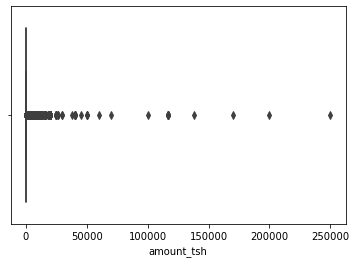

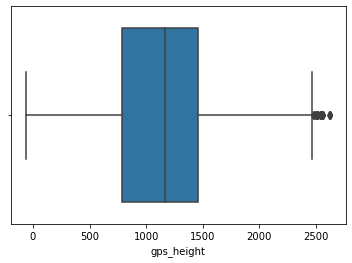

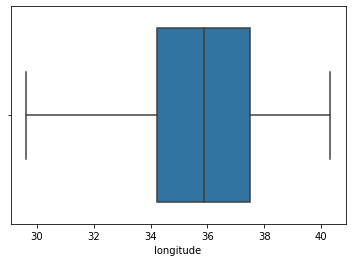

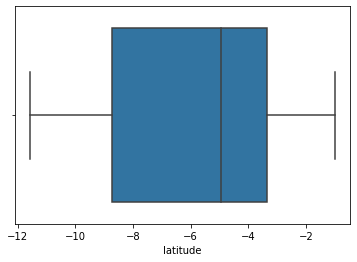

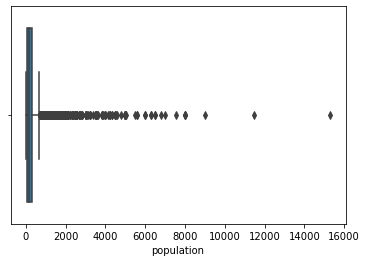

In [69]:
for n, col in enumerate(df.select_dtypes(include=[int, float])):
    plt.figure(n)
    sns.boxplot(x=df[col]);
    
    

In [70]:
df.yrs_operation.value_counts()

-99    6192
 3     1361
 5     1317
 1     1180
 2     1171
 4     1143
 11     907
 7      828
 33     786
 6      770
 8      715
 14     647
 13     619
 10     574
 31     533
 39     516
 35     474
 27     458
 41     453
 15     444
 19     425
 37     412
 9      412
 23     388
 16     378
 26     363
 18     358
 29     336
 12     334
 21     326
 25     306
 28     304
 38     276
 36     249
 17     223
 30     215
 40     205
 43     185
 20     180
 22     162
 24     138
 34     133
 50      81
 32      62
 42      57
 46      40
 44      36
 45      34
 53      27
 51      25
 49      21
 48      20
 52       8
 47       6
Name: yrs_operation, dtype: int64

In [ ]:
#add a modified lga column keeping whether the it is noted as rural, urban or not
df.loc[:, 'lga2'] = df.lga.apply(lambda x: 'rural' if x.split(' ')[-1]=='Rural' 
                                 else 'urban' if x.split(' ')[-1]=='Urban' else 'other')

## Column Drops
Drop recorded_by as all values are all the same

In [73]:
df.drop('recorded_by', axis=1, inplace=True)

Potential drops -similar columns:   
2 of extraction_type_class(7), extraction_type_group(13), extraction_type(18)   
1 of management_group(5), management(12)
1 of scheme_name(2696), scheme_management(12)
1 of payment(7), payment_type(7)
1 of quality_group(6), water_quality(8)
1 of quantity_group(5), quantity(5)
1 of source_class(3), source_type(7), source(10)
1 of waterpoint_type_group(6), waterpoint_type(7)
amount_tsh -due to amount of missing data


bin small frequencies into 'other'

In [74]:
for col in df.select_dtypes(object):
    print(col, '\t\t\t', len(df[col].value_counts()))

funder 			 866
installer 			 908
wpt_name 			 18344
basin 			 9
subvillage 			 8940
region 			 21
lga 			 109
ward 			 1310
scheme_management 			 10
scheme_name 			 2577
extraction_type 			 16
extraction_type_group 			 13
extraction_type_class 			 7
management 			 11
management_group 			 5
payment 			 7
payment_type 			 7
water_quality 			 8
quality_group 			 6
quantity 			 5
quantity_group 			 5
source 			 10
source_type 			 7
source_class 			 3
waterpoint_type 			 7
waterpoint_type_group 			 6
status_group 			 3


## Grouping
For high cardinality features

In [78]:
z = 100
keep = {}
for col in df.select_dtypes(object):
    a = df[col].value_counts()
    c = len(a)
    if c > z:
        keep[col] = a.index[:z]
        df.loc[:,col] = df.apply(lambda x: x[col] if x[col] in keep[col] else 'other', axis=1)

In [79]:
df.funder.value_counts().index

Index(['Government Of Tanzania', 'other', 'Danida', 'World Bank', 'Unicef',
       'Norad', 'Private Individual', 'Germany Republi', 'District Council',
       'Ministry Of Water',
       ...
       'Plan Int', 'Miziriol', 'Acra', 'Concern', 'Plan International', 'Undp',
       'Commu', 'Dwe/norad', 'Giz', 'Nethalan'],
      dtype='object', length=101)

## Categorical numbers
Some features are numeric but refer to categories, I'll change these to objects.

In [85]:
cols = ['region_code', 'district_code']
for col in cols:
    df.loc[:,col] = df[col].astype('object')

In [1]:
len(df)

NameError: name 'df' is not defined

In [ ]:
#plt.figure(figsize=(10,4))
#sns.countplot(X_train['month_recorded'], hue = y_train['status_group'])

Many categorical features with high cardinality    
Options:  
OHE  
non-sklearn algorithm  
target encoding -replace each category with its average target value   (regression, careful with multiclass problem (median or weighted median?))
    -from category_encoders import TargetEncoder  
frequency encoding  
fastai -embeddings for categorical variables  
